In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
data = pd.read_csv('D:/iris.csv', sep=',')
data = data.drop(columns = ['Unnamed: 0'])
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data['Label']=LabelEncoder().fit_transform(data['Species'])
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [4]:
from sklearn.model_selection import train_test_split
#Define Y
y = data['Label']

#Define x
x = data.drop(['Species','Label'], axis=1)

#Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=None, shuffle=False)

In [5]:
#Buat Model
#Create Decision Tree Classifier Object
clf = DecisionTreeClassifier()

#Train Decision Tree Classifier
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [6]:
#Evaluasi Model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7105263157894737


VISUALISASI

In [7]:
#pip install six

Note: you may need to restart the kernel to use updated packages.


In [8]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [9]:
#pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [11]:
feature_cols = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

In [12]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, feature_names = feature_cols, class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [13]:
from graphviz import Digraph

In [14]:
#conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [21]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'

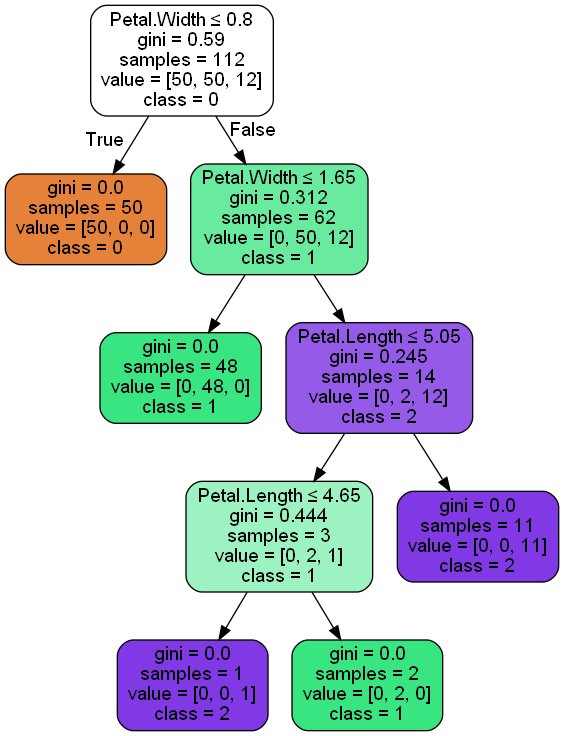

In [22]:
graph.write_png('iris.png')
Image(graph.create_png())